In [65]:
import uproot 
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [66]:
file=uproot.open("../run/mchdigits.root")
file["o2sim"].keys()

['rofs',
 'rofs/rofs.mBCData.bc',
 'rofs/rofs.mBCData.orbit',
 'rofs/rofs.mDataRef.mFirstEntry',
 'rofs/rofs.mDataRef.mEntries',
 'rofs/rofs.mBCWidth',
 'digits',
 'digits/digits.mTFtime',
 'digits/digits.mNofSamples',
 'digits/digits.mIsSaturated',
 'digits/digits.mDetID',
 'digits/digits.mPadID',
 'digits/digits.mADC']

In [114]:
#rofs=next(file['o2sim'].iterate(filter_name="rofs/*",library="pd",step_size="10MB"))
rofs=file['o2sim'].arrays(filter_name="rofs/*",library="pd")
digits=next(file['o2sim'].iterate(filter_name="digits/*",step_size="10MB",library="pd"))

In [115]:
digits.describe()

,digits.mTFtime,digits.mNofSamples,digits.mDetID,digits.mPadID,digits.mADC
count,1.304798e+06,1.304798e+06,1.304798e+06,1.304798e+06,1.304798e+06
mean,2.240044e+05,2.108150e+01,7.431357e+02,3.910406e+03,2.014167e+02
std,1.347898e+05,1.888511e+01,2.034957e+02,5.410714e+03,2.240330e+04
min,-1.431550e+05,1.000000e+00,1.000000e+02,0.000000e+00,2.000000e+00
25%,1.188950e+05,1.400000e+01,7.090000e+02,1.111000e+03,2.300000e+01
50%,2.360390e+05,1.400000e+01,7.250000e+02,1.921000e+03,2.800000e+01
75%,3.361452e+05,2.200000e+01,9.090000e+02,4.766000e+03,4.400000e+01
max,1.047126e+06,1.023000e+03,1.025000e+03,2.828600e+04,9.368551e+06


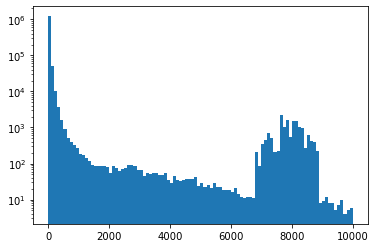

In [116]:
plt.hist(digits[digits["digits.mADC"]<10000]["digits.mADC"],bins=100);
plt.yscale("log")

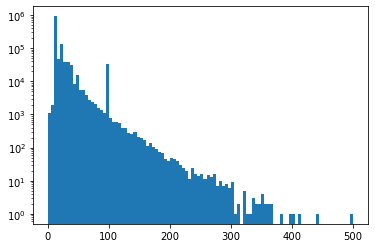

In [117]:
plt.hist(digits[digits["digits.mADC"]<10000]["digits.mNofSamples"],bins=100);
plt.yscale("log")

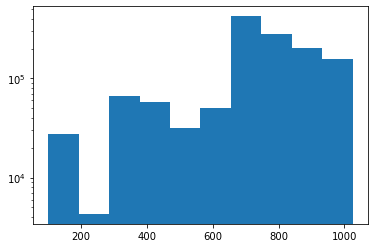

In [118]:
plt.hist(digits[digits["digits.mADC"]<10000]["digits.mDetID"]);
plt.yscale("log")

In [119]:
rofs["rofs.mBCWidth"].describe()

count    2.132811e+06
mean     2.707113e+01
std      1.377010e+01
min      4.000000e+00
25%      1.400000e+01
50%      3.400000e+01
75%      4.000000e+01
max      4.300000e+01
Name: rofs.mBCWidth, dtype: float64

array([[<AxesSubplot:title={'center':'rofs.mBCWidth'}>]], dtype=object)

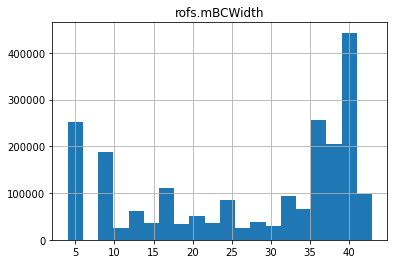

In [120]:
rofs.hist("rofs.mBCWidth",bins=20)

array([[<AxesSubplot:title={'center':'rofs.mBCData.orbit'}>]],
      dtype=object)

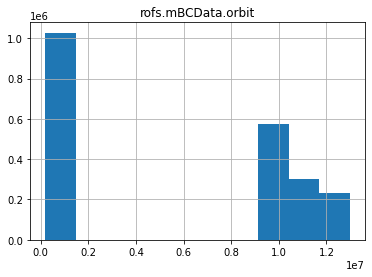

In [121]:
rofs.hist("rofs.mBCData.orbit")

In [122]:
orbits=rofs["rofs.mBCData.orbit"].unique()

In [123]:
len(orbits)/128

167.1875

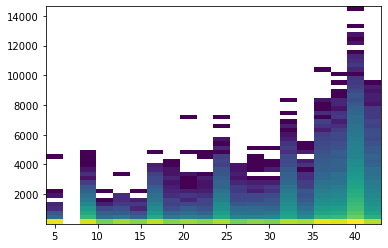

In [124]:
#plt.hist(rofs["rofs.mDataRef.mEntries"],bins=100)
plt.hist2d(rofs["rofs.mBCWidth"],rofs["rofs.mDataRef.mEntries"],norm=colors.LogNorm(),bins=(20,50));